# Generate magnitude and phase plot from .aif impulse response

Audio loaded with sampling rate = 48000 Hz and 227825 samples.


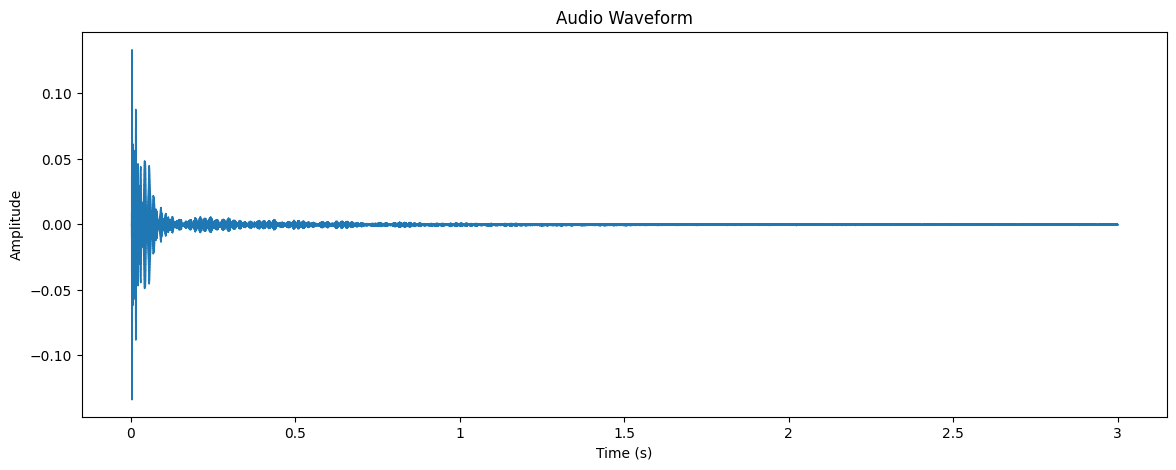

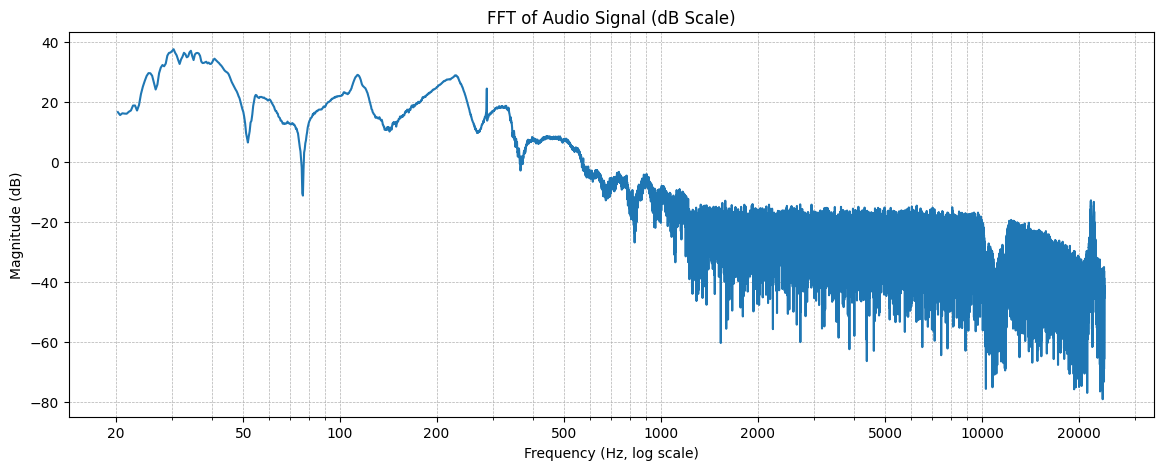

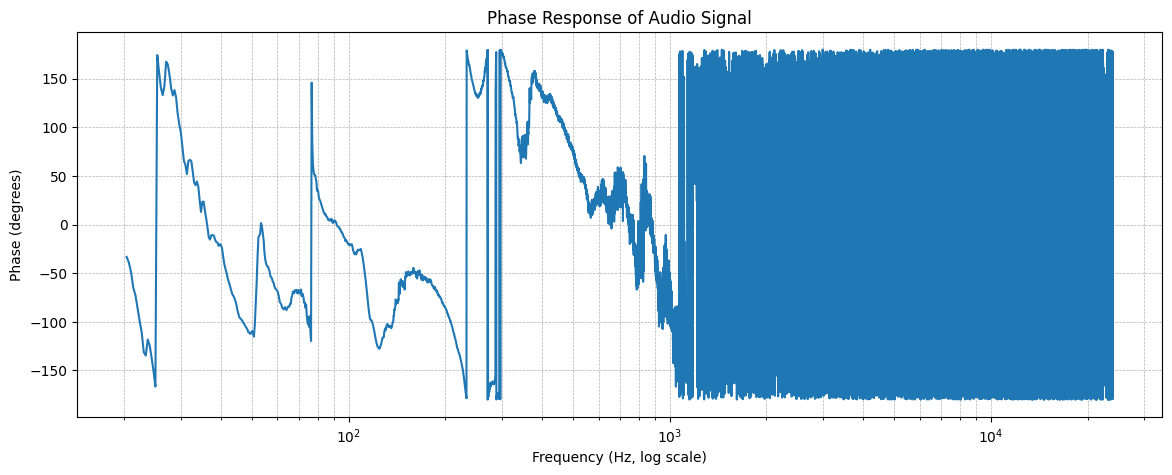

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy

# filename = 'deconv_responses/IR_v2_1.wav'
filename = 'deconv_responses/test.wav'
y, sr = librosa.load(filename, sr=None)
print(f"Audio loaded with sampling rate = {sr} Hz and {len(y)} samples.")

plt.figure(figsize=(14, 5))
y = y[:(3*sr)]
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Compute FFT and corresponding frequency values
fft_vals = np.fft.fft(y)
fft_mag = np.abs(fft_vals)
fft_freq = np.fft.fftfreq(len(fft_vals), 1/sr)

# Filter to keep only positive frequencies
mask = fft_freq > 20
fft_freq_pos = fft_freq[mask]
fft_mag_pos = fft_mag[mask]

# Convert magnitude to decibels
epsilon = 1e-10
fft_db = 20 * np.log10(fft_mag_pos + epsilon)

plt.figure(figsize=(14, 5))
plt.plot(fft_freq_pos, fft_db)
plt.xscale('log')
plt.title("FFT of Audio Signal (dB Scale)")
plt.xlabel("Frequency (Hz, log scale)")
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", ls="--", lw=0.5)

# Define custom reference frequency ticks (in Hz)
reference_ticks = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
plt.xticks(reference_ticks, reference_ticks)

plt.show()
phase_rad = np.angle(fft_vals)
phase_deg = np.degrees(phase_rad)
phase_deg_pos = phase_deg[mask]
plt.figure(figsize=(14, 5))
plt.plot(fft_freq_pos, phase_deg_pos)
plt.xscale('log')
plt.title("Phase Response of Audio Signal")
plt.xlabel("Frequency (Hz, log scale)")
plt.ylabel("Phase (degrees)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()